In [13]:
import torch
import torch.nn as nn
from torchsummary import summary
from torchvision.datasets import MNIST
import torchvision.transforms as tfs
from torch.utils.data import DataLoader

In [14]:
features = 28**2
classes = 10
batch_size = 128

#transformation composition
data_tfs = tfs.Compose([tfs.ToTensor(), tfs.Normalize(mean=0.5, std=0.5)])
root = './'
train_data = MNIST(root, train=True, transform=data_tfs, download=True)
test_data = MNIST(root, train=False, transform=data_tfs, download=True)

train_loader = DataLoader(train_data, batch_size=batch_size, drop_last=True)
test_loader = DataLoader(test_data, batch_size=batch_size, drop_last=True)

device = torch.device('cuda:0') if torch.cuda.is_available else torch.device('cpu')
model = nn.Sequential(nn.Linear(28**2, 64),
                      nn.ReLU(),
                      nn.Linear(64, 10))


In [15]:
summary(model, (features,), batch_size=228)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [228, 64]          50,240
              ReLU-2                  [228, 64]               0
            Linear-3                  [228, 10]             650
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.68
Forward/backward pass size (MB): 0.24
Params size (MB): 0.19
Estimated Total Size (MB): 1.12
----------------------------------------------------------------


In [16]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3, betas=(0.9, 0.99))

epochs = 3
history = []

for epoch_number in range(epochs):
  for x_train, y_train in train_loader:
    x_train = x_train.view(x_train.shape[0], -1)
    y_train 

    logits = model(x_train)
    loss = criterion(logits, y_train)
    history.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [17]:
import matplotlib.pyplot as plt 

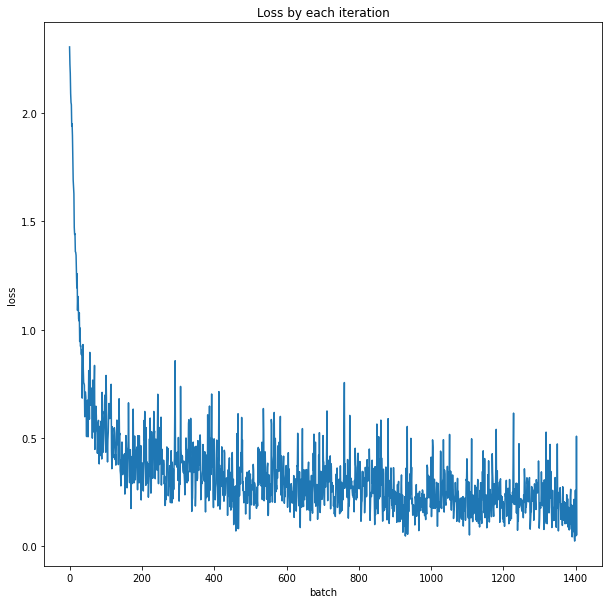

In [18]:
plt.figure(figsize=(10,10))
plt.plot(history)
plt.title('Loss by each iteration')
plt.xlabel('batch')
plt.ylabel('loss')
plt.show()

Model accuracy calculating:

In [19]:
from sklearn.metrics import accuracy_score

In [20]:
accuracy = 0
batches = 0

for x_batch, y_batch in test_loader:
  batches += 1
  x_batch = x_batch.view(x_batch.shape[0], -1)
  y_batch = y_batch

  predictions = torch.argmax(model(x_batch), dim=1)
  accuracy += accuracy_score(y_batch, predictions)

print(f'Accuracy - {accuracy / batches}')

Accuracy - 0.9407051282051282
